# Aakash Tirathdas

## Research question/interests

**To what degree has the COVID-19 pandemic affected the aeropolane industry in terms of delayed and cancelled flights, and was there an improvement of sorts over the period of the January 2022?**

I would look into this question by going over the relationship between the flights delayed and cancelled and its relation to the point of time within the month to see if there was any improvement of sorts.

I would do this through as several number of comparisms, some being:

- The percentage of flights delayed, cancelled and both per day. 
    - This could be done by finding the (flights delayed/cancelled/both within the day/total flights during the day)*100 for each week.
    
- The percentage of flights delayed, cancelled and both per week.
    - This could be done by finding the (flights delayed/cancelled/both within the week/total flights during the week)*100 for each week.

- The average number of flights delayed, cancelled and both depending on the day of the week.
    - For example, the average number of flights delayed on Mondays over January 2022.
    
- The average and total time of delay for each day and its relationship through the month.

- To check whether the delay is affected by the distance travelled by the aeroplane. 
    - This can be done by having different groups with different distance travelled and forming a value of average delayed time. 



---

## Imported libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

### Seaborn theme setup

In [ ]:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )

## Loaded data set

In [ ]:

df = pd.read_csv('../data/raw/Jan_2020_ontime.csv')
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [ ]:
cancellation_daily=df.loc[:,["DAY_OF_MONTH","CANCELLED","DEP_DEL15","ARR_DEL15"]]
#making the columns of type boolean
cancellation_daily["CANCELLED"]=cancellation_daily["CANCELLED"].astype(bool)
cancellation_daily["DEP_DEL15"]=cancellation_daily["DEP_DEL15"].astype(bool)
cancellation_daily["ARR_DEL15"]=cancellation_daily["ARR_DEL15"].astype(bool)
cancellation_daily

,DAY_OF_MONTH,CANCELLED,DEP_DEL15,ARR_DEL15
0,1,False,False,False
1,1,False,False,False
2,1,False,False,False
3,1,False,False,False
4,1,False,False,False
...,...,...,...,...
607341,31,False,True,True
607342,31,False,False,False
607343,31,False,False,False
607344,31,False,False,False


In [ ]:
#making a dataset which has a count of all the true values in the 3 columns above
counts_df=cancellation_daily.groupby("DAY_OF_MONTH")[["CANCELLED","DEP_DEL15","ARR_DEL15"]].sum()
counts_df

,CANCELLED,DEP_DEL15,ARR_DEL15
DAY_OF_MONTH,,,
1,121,2550,2395
2,89,3034,2924
3,92,4050,4061
4,60,4342,4598
5,78,3714,3355
6,52,2752,2695
7,77,1784,1717
8,84,2417,2439
9,44,1747,1702


[Text(0.5, 1.0, 'Flights adjusted daily'), Text(0, 0.5, 'Number of flights')]

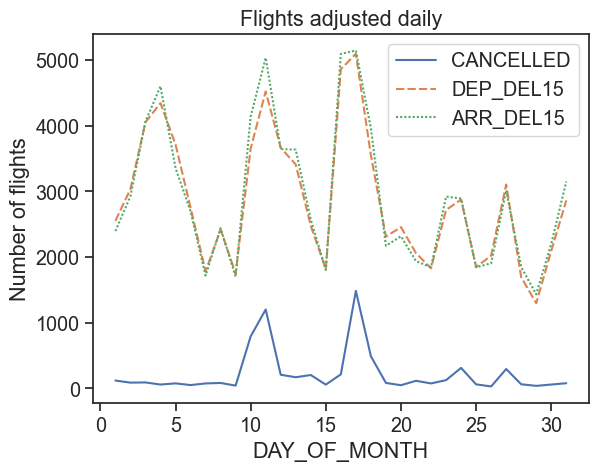

In [ ]:
ax_daily_plot1=sns.lineplot(data= counts_df)
ax_daily_plot1.set(title="Flights adjusted daily", ylabel="Number of flights")